In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [2]:
df = pd.read_csv('Data/kc_house_data.csv').drop('Unnamed: 0', axis = 1)
df['price'] = df.price.map(lambda x: x/1000000)


df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,0.22190,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,0.53800,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,0.18000,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,0.60400,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,0.51000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1.23000,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,0.25750,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,1530.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,0.29185,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,0.22950,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,0.32300,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
pd.DataFrame(df.corr()['price'])

,price
id,-0.016772
price,1.000000
bedrooms,0.308787
bathrooms,0.525906
sqft_living,0.701917
sqft_lot,0.089876
floors,0.256804
waterfront,0.276295
view,0.395734
condition,0.036056


Correlation over .5 --> bathrooms, sqft_living, grade, sqft_above, sqft_living15

In [8]:
standard = StandardScaler()
x = df[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
y = df[['price']]
print(x)
x = standard.fit_transform(x)
print(x)
random_state = 0 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .8, random_state = 0)

reg = LinearRegression()
reg.fit(x_train, y_train)
predictions = reg.predict(x_test)

       bathrooms  sqft_living  grade  sqft_above  sqft_living15
0           1.00         1180      7        1180           1340
1           2.25         2570      7        2170           1690
2           1.00          770      6         770           2720
3           3.00         1960      7        1050           1360
4           2.00         1680      8        1680           1800
...          ...          ...    ...         ...            ...
21592       2.50         1530      8        1530           1530
21593       2.50         2310      8        2310           1830
21594       0.75         1020      7        1020           1020
21595       2.50         1600      8        1600           1410
21596       0.75         1020      7        1020           1020

[21597 rows x 5 columns]
[[-1.45107268 -0.98065209 -0.56080027 -0.73525069 -0.94367562]
 [ 0.17448579  0.53336915 -0.56080027  0.46077619 -0.43288674]
 [-1.45107268 -1.4272339  -1.41318983 -1.23057495  1.07029196]
 ...
 [-1.7761843

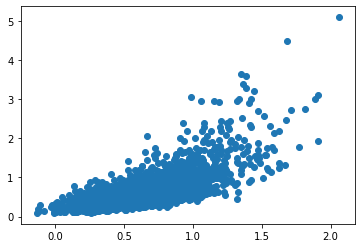

In [5]:
plt.scatter(predictions, y_test)

In [6]:
mean_absolute_error(y_test, predictions)

0.16360766811570956

In [7]:
mean_squared_error(y_test, predictions)

0.061788494936821724